In [1]:
import glob
import os
import pandas as pd
import wandb

In [2]:
layer_name_to_exp = {
    "h3": "dfa/h3",
    "linear_transformer": "dfa/linear_transformer",
    "hyena": "dfa/hyena",
    "transformer": "dfa/transformer",
    "rwkv": "dfa/rwkv",
    "s4d": "dfa/s4d",
    "lstm": "dfa/lstm",
    "retention": "dfa/retnet",
    "mamba": "dfa/mamba",
}

In [3]:
# glob all checkpoints
run_folders = glob.glob("experiments/**/wandb/run-*/", recursive=True)
# create a map
name_to_folder = {}
for folder in run_folders:
    folder = folder.replace("//", "/").strip('/')
    subpaths = folder.split('/')
    name = subpaths[-1]
    name = name.split("-")[-1]
    main_folder = "/".join((subpaths[:-2]))
    folder = os.path.join(main_folder, "checkpoints", "val", "loss.ckpt")
    name_to_folder[name] = folder

In [4]:
name_to_folder

{'z0aga2fb': 'experiments/hiddensold/softmax_transformer/checkpoints/val/loss.ckpt',
 'fbj1ptd9': 'experiments/hiddensold/softmax_transformer/2023-12-03/17-51-42-225142/checkpoints/val/loss.ckpt',
 'k7hce2ox': 'experiments/hiddensold/softmax_transformer/2023-12-03/17-59-21-141536/checkpoints/val/loss.ckpt',
 'dv15dpwd': 'experiments/hiddensold/softmax_transformer/2023-12-03/17-55-01-342823/checkpoints/val/loss.ckpt',
 'uefv64vy': 'experiments/hiddensold/softmax_transformer/2023-12-03/17-15-42-738873/checkpoints/val/loss.ckpt',
 'f8ynmvmh': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 'i1k8s729': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 'rviumntw': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 'g52wtjjw': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 'so7b8v8i': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 '1nw4hv1u': 'experiments/hiddensold/transformer/checkpoints/val/loss.ckpt',
 'i8a

In [5]:
api = wandb.Api()
entity, project = "akyurek", "associative_recall_learning_curves_eval"
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list, attr_list = [], [], [], []
for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items()})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    #
    attr_list.append(run._attrs)


runs_df = pd.DataFrame(
    {
        "summary": summary_list,
        "config": config_list,
        "name": name_list,
        "attr": attr_list,
    }
)

In [6]:
def get_ckpt(x):
    ckpt = x.config["train"]
    ckpt = ckpt["ckpt"]
    if ckpt is None:
        folder = name_to_folder.get(x.attr["name"], None)
        if folder:
            ckpt = os.path.join(
                "/raid/lingo/akyurek/git/iclmodels/",
                folder,
                # "checkpoints",
                # "val",
                # "loss.ckpt",
            )

    return ckpt

In [7]:
def get_nested_arg(x, args):
    for arg in args:
        try:
            x = x[arg]
        except:
            return None
    return x

In [8]:
runs_df

,summary,config,name,attr
0,"{'trainer/global_step': 15800, 'final_test/acc...","{'task': {'loss': 'cross_entropy', '_name_': '...",elated-armadillo-286,{'id': 'UnVuOnYxOjZyajZkN2tuOmFzc29jaWF0aXZlX3...
1,"{'test/loss': 6.459627628326416, 'trainer/glob...","{'task': {'loss': 'cross_entropy', '_name_': '...",fanciful-planet-285,{'id': 'UnVuOnYxOjh6ZzJwendmOmFzc29jaWF0aXZlX3...
2,"{'trainer/lr': 2.7777777777777784e-08, '_step'...","{'task': {'loss': 'cross_entropy', '_name_': '...",glowing-glitter-284,{'id': 'UnVuOnYxOm9peXdpMmhkOmFzc29jaWF0aXZlX3...
3,"{'trainer/lr': 5.555555555555557e-08, 'final_t...","{'task': {'loss': 'cross_entropy', '_name_': '...",solar-sun-283,{'id': 'UnVuOnYxOm50ZmNkd2hzOmFzc29jaWF0aXZlX3...
4,"{'timer/epoch': 0.990797519683838, 'train/perp...","{'task': {'loss': 'cross_entropy', '_name_': '...",woven-armadillo-282,{'id': 'UnVuOnYxOjdpOW9rYmEyOmFzc29jaWF0aXZlX3...
...,...,...,...,...
281,"{'trainer/loss': 1.5143609046936035, 'final_te...","{'task': {'loss': 'cross_entropy', '_name_': '...",floral-wind-8,{'id': 'UnVuOnYxOmppN2t1MnVvOmFzc29jaWF0aXZlX3...
282,"{'test/loss': 4.116175651550293, 'final_val/pe...","{'task': {'loss': 'cross_entropy', '_name_': '...",deft-yogurt-4,{'id': 'UnVuOnYxOm14aXhwaDdmOmFzc29jaWF0aXZlX3...
283,"{'trainer/lr': 5.555555555555557e-08, 'final_v...","{'task': {'loss': 'cross_entropy', '_name_': '...",leafy-waterfall-1,{'id': 'UnVuOnYxOjFuZXpjbjR0OmFzc29jaWF0aXZlX3...
284,"{'val/loss': 0.002327519468963146, 'val/perple...","{'task': {'loss': 'cross_entropy', '_name_': '...",peach-dust-2,{'id': 'UnVuOnYxOmF0aGxzdnBzOmFzc29jaWF0aXZlX3...


In [9]:
for metric in ["dfa_accuracy", "model_dfa_diff", "loss", "accuracy_ignore_index"]:
    runs_df[f"final_test/{metric}"] = runs_df.summary.map(
        lambda x: x.get(f"final_test/{metric}", None)
    )
for config in [
    "model.layer._name_",
    "dataset.num_examples",
    "model.n_layer",
    "model.d_model",
    "optimizer.lr",
    "optimizer.weight_decay",
    "experiment",
    "hydra.run.dir",
    "model.attn_cfg.n_heads",
    "model.attn_cfg.num_heads",
    "dataset.vocab_size",
    "dataset.input_seq_len",
    "dataset.batch_size",
    "model.attn_layer_idx",
]:
    config_parts = config.split(".")
    # get the value by nested index
    runs_df[config] = runs_df.config.map(lambda x: get_nested_arg(x, config_parts))

# if model.layer._name_ is None, set it to linear attention
runs_df["model.layer._name_"] = runs_df["model.layer._name_"].fillna("linear_transformer")

runs_df["ckpt"] = runs_df.apply(get_ckpt, axis=1)


# runs_df.dropna(subset=["final_test/model_dfa_diff"], inplace=True)
runs_df.sort_values(by="final_test/loss", ascending=True, inplace=True)

# remove columns
runs_df.drop(columns=["summary", "config", "attr"], inplace=True)

In [10]:
runs_df

,name,final_test/dfa_accuracy,final_test/model_dfa_diff,final_test/loss,final_test/accuracy_ignore_index,model.layer._name_,dataset.num_examples,model.n_layer,model.d_model,optimizer.lr,optimizer.weight_decay,experiment,hydra.run.dir,model.attn_cfg.n_heads,model.attn_cfg.num_heads,dataset.vocab_size,dataset.input_seq_len,dataset.batch_size,model.attn_layer_idx,ckpt
191,valiant-shadow-95,None,None,0.002952,1.000,transformer,2500,8,128,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
285,usual-gorge-3,None,None,0.003626,1.000,transformer,5000,8,128,0.00010,0.10,None,None,NaN,1.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
72,summer-water-214,None,None,0.003715,1.000,linear_transformer,2500,2,256,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1}",/raid/lingo/akyurek/git/iclmodels/experiments/...
92,noble-cosmos-194,None,None,0.004328,1.000,transformer,1250,4,256,0.00025,0.01,None,None,NaN,1.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3}",/raid/lingo/akyurek/git/iclmodels/experiments/...
199,azure-microwave-87,None,None,0.004512,1.000,transformer,5000,8,128,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,hopeful-sun-265,None,None,5.098913,0.128,rwkv,625,2,256,0.00025,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
55,winter-voice-231,None,None,5.170772,0.284,h3,2500,2,256,0.00025,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
2,glowing-glitter-284,None,None,5.706687,0.128,rwkv,625,4,256,0.00010,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
61,divine-wildflower-225,None,None,5.935856,0.178,h3,2500,2,256,0.00010,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...


In [12]:
# make neurips conference quality plots
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import scienceplots

plt.style.use(['science','ieee'])
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['xtick.minor.visible'] = False

In [23]:
color_palette = """1AA89E
302DBE
F17011
D3226F
6A6AF8
1461F0
5E00C9
E2BC09
BD4805
107F4B
B0E926""".split(
    "\n"
)
# convert to rgb
color_palette = [matplotlib.colors.to_rgb("#"+c) for c in color_palette]

In [24]:
model_names = {
    "transformer": "Transformer",
    "transformer_2": "Transformer (2 layers)",
    "transformer_1": "Transformer (1 layers)",
    "lstm": "LSTM",
    "hyena": "Hyena",
    "h3": "H3",
    "s4d": "S4D",
    "linear_transformer": "Linear Transformer",
    "rwkv": "RWKV",
    "retention": "RetNet",
    "mamba": "Mamba"
}

In [25]:
runs_df

,name,final_test/dfa_accuracy,final_test/model_dfa_diff,final_test/loss,final_test/accuracy_ignore_index,model.layer._name_,dataset.num_examples,model.n_layer,model.d_model,optimizer.lr,optimizer.weight_decay,experiment,hydra.run.dir,model.attn_cfg.n_heads,model.attn_cfg.num_heads,dataset.vocab_size,dataset.input_seq_len,dataset.batch_size,model.attn_layer_idx,ckpt
191,valiant-shadow-95,None,None,0.002952,1.000,transformer,2500,8,128,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
285,usual-gorge-3,None,None,0.003626,1.000,transformer,5000,8,128,0.00010,0.10,None,None,NaN,1.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
72,summer-water-214,None,None,0.003715,1.000,linear_transformer,2500,2,256,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1}",/raid/lingo/akyurek/git/iclmodels/experiments/...
92,noble-cosmos-194,None,None,0.004328,1.000,transformer,1250,4,256,0.00025,0.01,None,None,NaN,1.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3}",/raid/lingo/akyurek/git/iclmodels/experiments/...
199,azure-microwave-87,None,None,0.004512,1.000,transformer,5000,8,128,0.00025,0.10,None,None,NaN,2.0,40,384,32,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...",/raid/lingo/akyurek/git/iclmodels/experiments/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,hopeful-sun-265,None,None,5.098913,0.128,rwkv,625,2,256,0.00025,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
55,winter-voice-231,None,None,5.170772,0.284,h3,2500,2,256,0.00025,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
2,glowing-glitter-284,None,None,5.706687,0.128,rwkv,625,4,256,0.00010,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...
61,divine-wildflower-225,None,None,5.935856,0.178,h3,2500,2,256,0.00010,0.10,None,None,NaN,NaN,40,384,32,None,/raid/lingo/akyurek/git/iclmodels/experiments/...


/tmp/ipykernel_1296478/1936191532.py:12: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  ax = sns.lineplot(


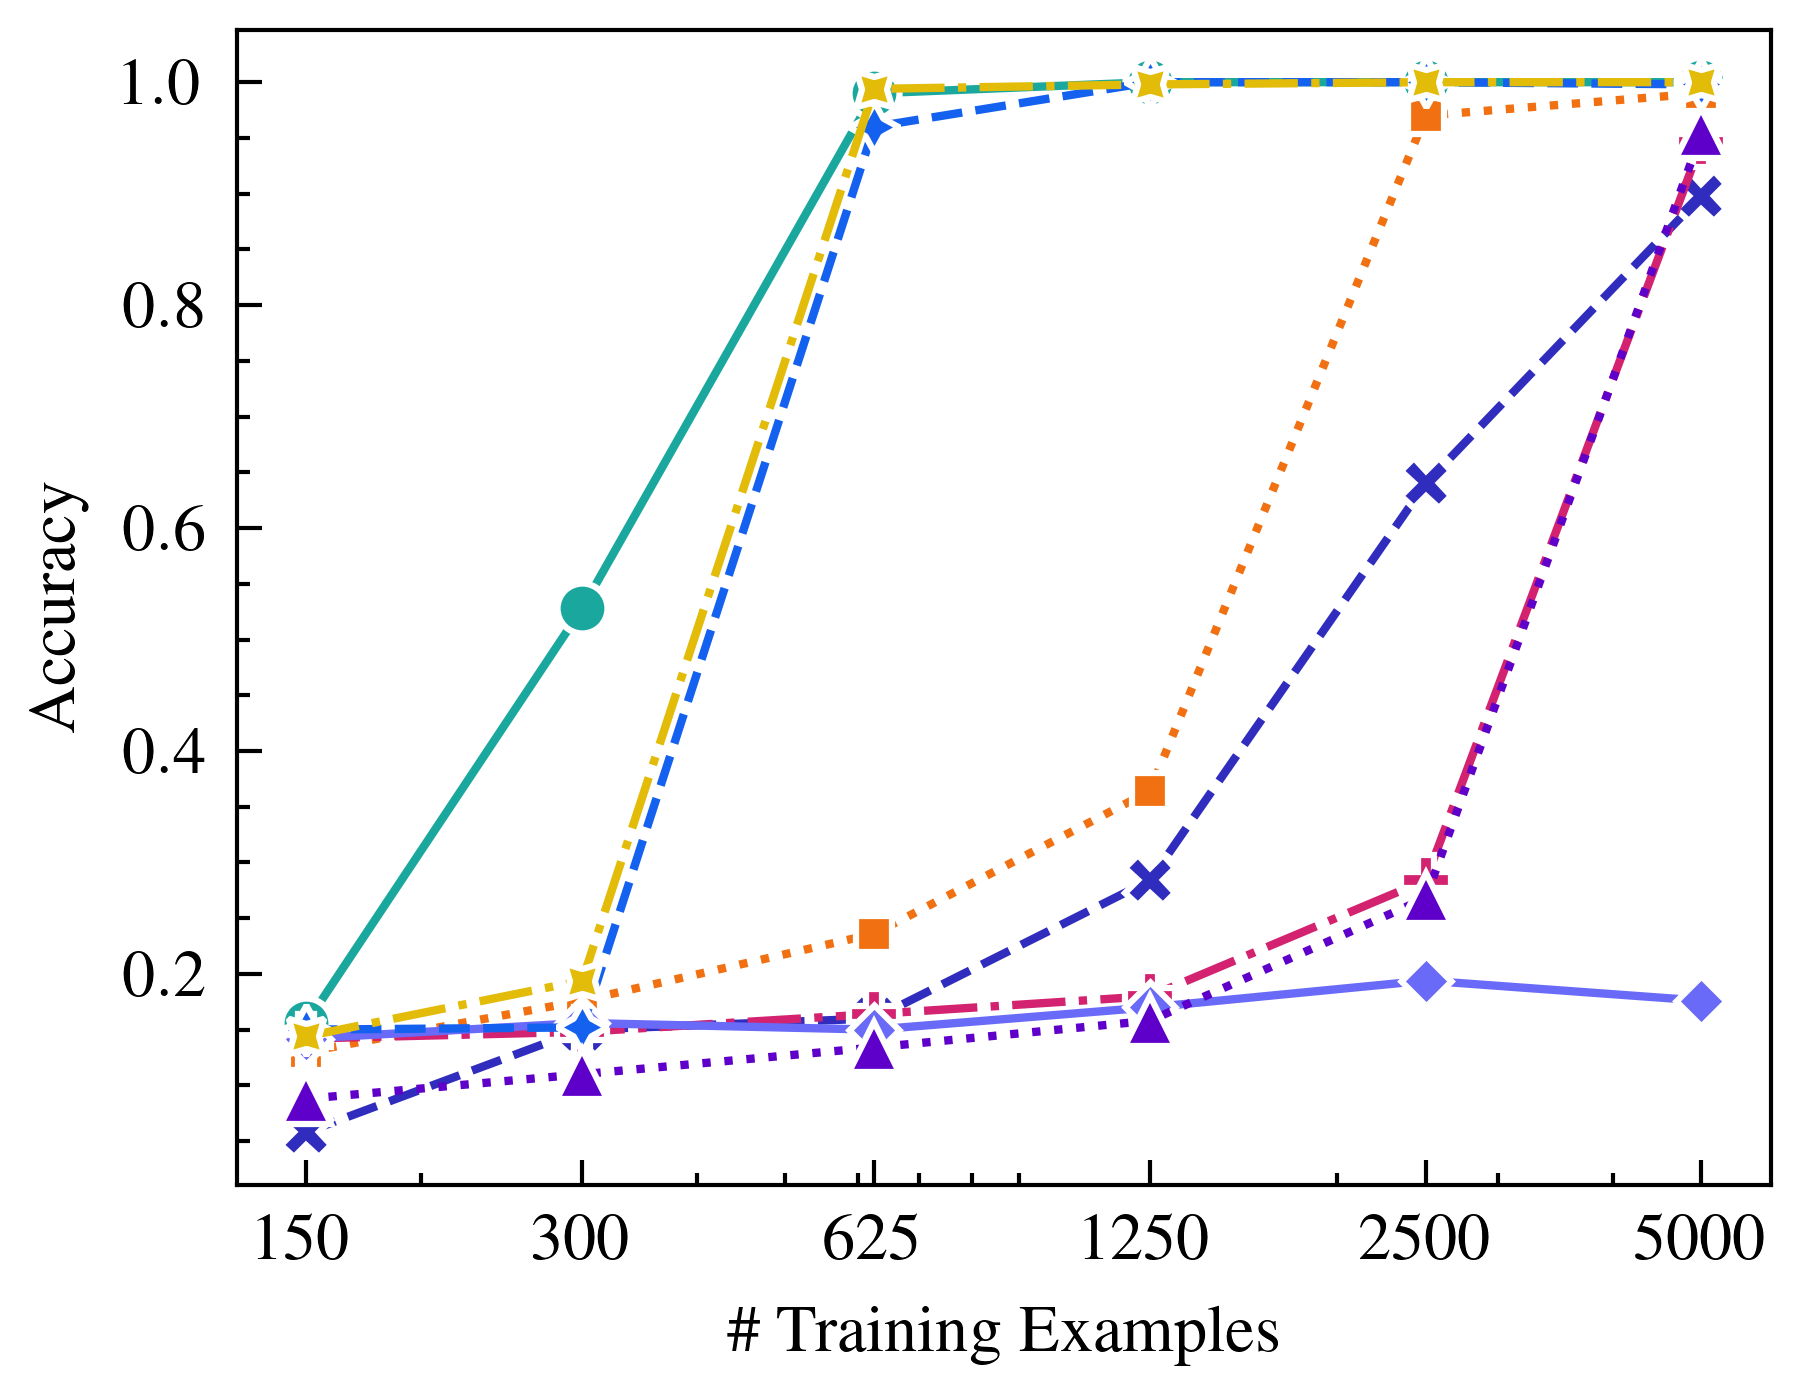

In [26]:
# fig size
# plt.rcParams.update({"figure.figsize": (6, 4)})
data = runs_df.loc[
    runs_df.groupby(["model.layer._name_", "dataset.num_examples"])[
        # "final_test/model_dfa_diff"
        "final_test/accuracy_ignore_index"
    ].idxmax()
]

data = data.replace({"model.layer._name_": model_names})
# display(data)
ax = sns.lineplot(
    data=data,
    x="dataset.num_examples",
    # y="final_test/model_dfa_diff",
    y="final_test/accuracy_ignore_index",
    hue="model.layer._name_",
    style="model.layer._name_",
    markers=True,
    dashes=False,
    palette=color_palette,
    hue_order=["Transformer", "LSTM", "Hyena", "H3", "S4D", "Linear Transformer", "RWKV", "RetNet", "Mamba"],
    style_order=["Transformer", "LSTM", "Hyena", "H3", "S4D", "Linear Transformer", "RWKV", "RetNet", "Mamba"],
)
# set legend false
ax.legend().remove()
ax.set_xlabel("\# Training Examples")
ax.set_ylabel("Accuracy")
ax.set(xscale="log")
ax.set_xticks([150, 300, 625, 1250, 2500, 5000])
# ax.set_xticks([1000, 2500, 5000, 10000, 20000, 40000])
# ax.legend(title='Model')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# save figure as pdf
plt.savefig("figures/assoc_accuracy.pdf")

In [43]:
import math

In [46]:
row["model.layer._name_"]

'mamba'

In [48]:
runs_to_run = []

data.sort_values(by="dataset.num_examples", ascending=False, inplace=True)
for i, row in data.iterrows():
    model_type = row["model.layer._name_"]
    exp_name = layer_name_to_exp[model_type]

    prefix = f"export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES={i % 16}; python eval.py wandb.project=dfa_best_runs hydra.run.dir='experiments/hiddens_{row['dataset.num_examples']}/{model_type}/' "
    prefix += f"experiment={exp_name} train.test=True dataset.num_test_examples=1000 train.ckpt='{row['ckpt']}' "

    for k in ["dataset.num_examples", "model.n_layer", "model.d_model", "optimizer.lr", "optimizer.weight_decay"]:
        prefix += f"{k}={row[k]} "

    if not math.isnan(row["model.attn_cfg.n_heads"]):
        prefix += f"model.attn_cfg.n_heads={int(row['model.attn_cfg.n_heads'])} "
        if model_type != "retention":
            prefix += "+model.return_attention=True "
    if not math.isnan(row["model.attn_cfg.num_heads"]):
        prefix += f"model.attn_cfg.num_heads={int(row['model.attn_cfg.num_heads'])} "
        if model_type != "retention":
            prefix += "+model.return_attention=True "

    if row["model.attn_layer_idx"]:
        prefix += f"model.attn_layer_idx='{list(row['model.attn_layer_idx'].values())}' "

    prefix += f"> experiments/hiddens_{row['dataset.num_examples']}/logs/{i}  2>&1 &"
    prefix = prefix.strip()

    runs_to_run.append(prefix)



In [49]:
print("\n".join(runs_to_run))

export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES=12; python eval.py wandb.project=dfa_best_runs hydra.run.dir='experiments/hiddens_40000/h3/' experiment=dfa/h3 train.test=True dataset.num_test_examples=1000 train.ckpt='/raid/lingo/akyurek/git/iclmodels/experiments/dfa/h3/2023-12-14/16-37-06-416464/checkpoints/val/loss.ckpt' dataset.num_examples=40000 model.n_layer=4 model.d_model=128 optimizer.lr=0.00025 optimizer.weight_decay=0.1 > experiments/hiddens_40000/logs/108  2>&1 &
export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES=10; python eval.py wandb.project=dfa_best_runs hydra.run.dir='experiments/hiddens_40000/linear_transformer/' experiment=dfa/linear_transformer train.test=True dataset.num_test_examples=1000 train.ckpt='/raid/lingo/akyurek/git/iclmodels/experiments/dfa/linear_transformer/2023-12-09/06-45-30-958611/checkpoints/val/loss.ckpt' dataset.num_examples=40000 model.n_layer=4 model.d_model=256 optimizer.lr=0.0001 optimizer.weight_decay=0.1 model.attn_cfg.num_heads=2 +mo

In [50]:
# only print mamba
print("\n".join([x for x in runs_to_run if "mamba" in x]))

export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES=1; python eval.py wandb.project=dfa_best_runs hydra.run.dir='experiments/hiddens_40000/mamba/' experiment=dfa/mamba train.test=True dataset.num_test_examples=1000 train.ckpt='/raid/lingo/akyurek/git/iclmodels/experiments/dfa/mamba/2023-12-20/20-54-43-950586/checkpoints/val/loss.ckpt' dataset.num_examples=40000 model.n_layer=8 model.d_model=512 optimizer.lr=0.00025 optimizer.weight_decay=0.1 > experiments/hiddens_40000/logs/17  2>&1 &
export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES=0; python eval.py wandb.project=dfa_best_runs hydra.run.dir='experiments/hiddens_20000/mamba/' experiment=dfa/mamba train.test=True dataset.num_test_examples=1000 train.ckpt='/raid/lingo/akyurek/git/iclmodels/experiments/dfa/mamba/2023-12-20/20-54-43-502884/checkpoints/val/loss.ckpt' dataset.num_examples=20000 model.n_layer=4 model.d_model=512 optimizer.lr=0.00025 optimizer.weight_decay=0.1 > experiments/hiddens_20000/logs/16  2>&1 &
export PYTHONHASHS

In [ ]:
# fig size
plt.rcParams.update({"figure.figsize": (6, 4)})
data = runs_df.loc[
    runs_df.groupby(["model.layer._name_", "dataset.num_examples"])[
        "final_test/model_dfa_diff"
    ].idxmin()
]
ax = sns.lineplot(
    data=data,
    x="dataset.num_examples",
    y="final_test/model_dfa_diff",
    hue="model.layer._name_",
    marker="o",
)
# update x label
ax.set_xlabel("# Training Examples")
ax.set_ylabel("L1")
ax.set(xscale="log")
ax.set_xticks([1000, 2500, 5000, 10000, 20000, 40000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(title='Model')

In [ ]:
import pickle